In [135]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Check for missing values
print(data.isnull().sum())

# Get summary statistics
print(data.describe())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [137]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Encode categorical variables (Gender)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Scale numerical features (e.g., Annual Income and Spending Score)
scaler = MinMaxScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])


In [138]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.008197,0.051020
3,4,0,23,0.008197,0.775510
4,5,0,31,0.016393,0.397959


In [139]:
data=data.drop(['CustomerID'], axis=1) #customerid is not useful for our clustering

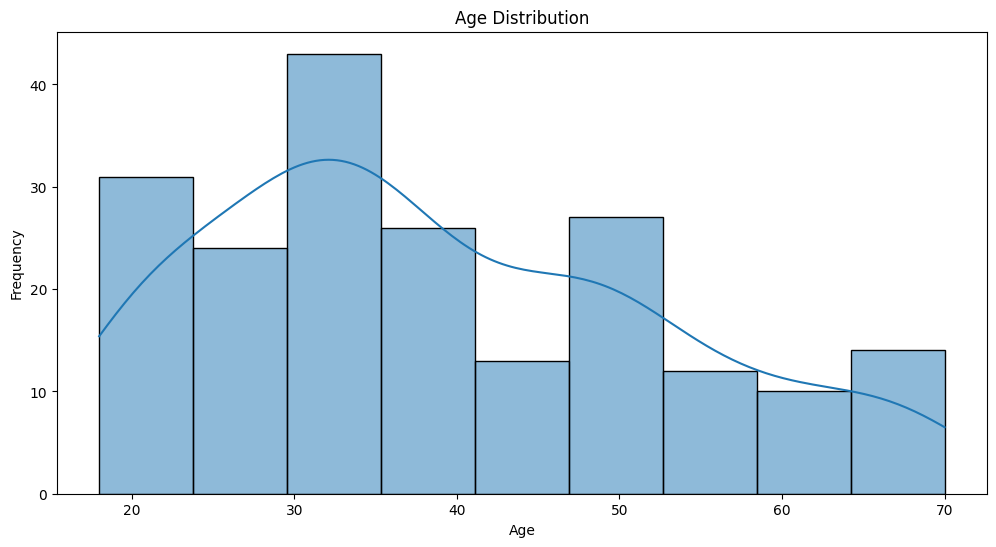

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


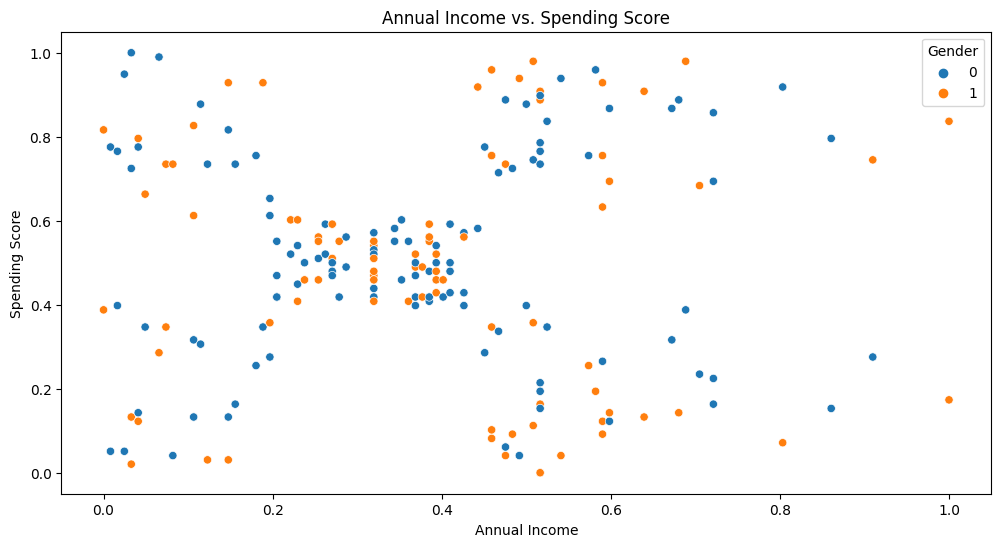

In [140]:
# Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Gender'])
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<Figure size 1200x600 with 0 Axes>

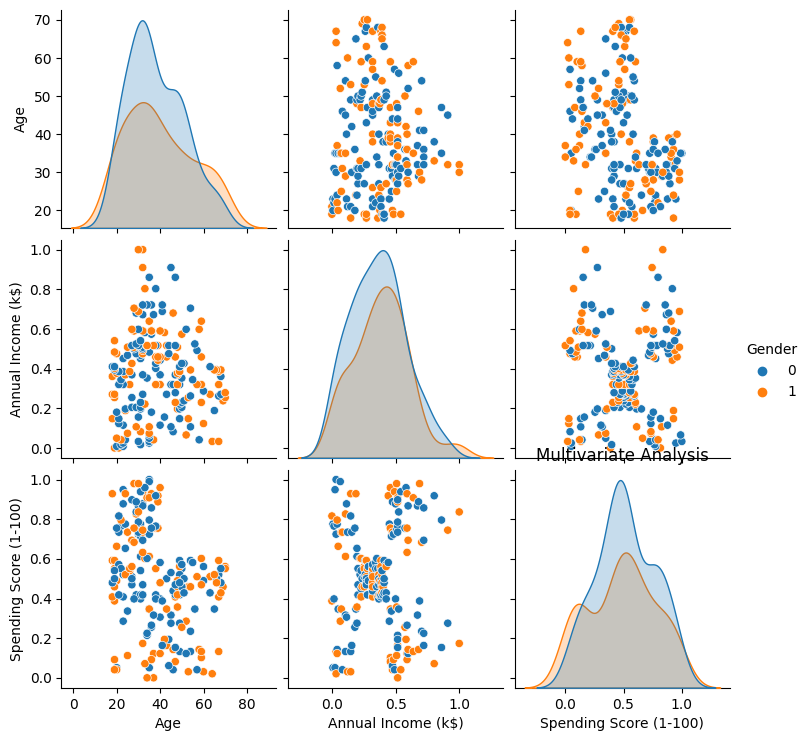

In [142]:
# Multivariate Analysis
plt.figure(figsize=(12, 6))
sns.pairplot(data, hue='Gender')
plt.title('Multivariate Analysis')
plt.show()

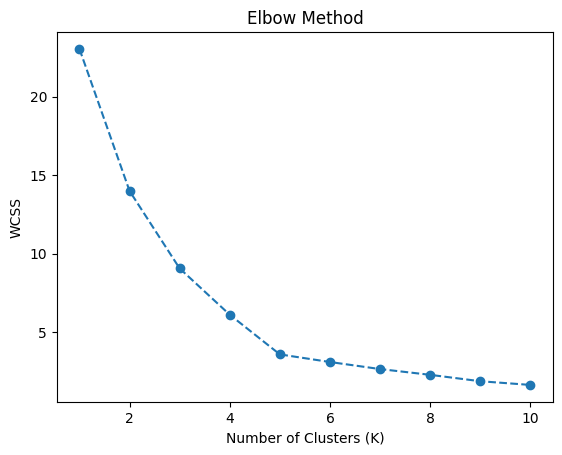

In [143]:
from sklearn.cluster import KMeans

# Selecting features for clustering
X = data[[ 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determining the optimal number of clusters (K) using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph to find the optimal K
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()



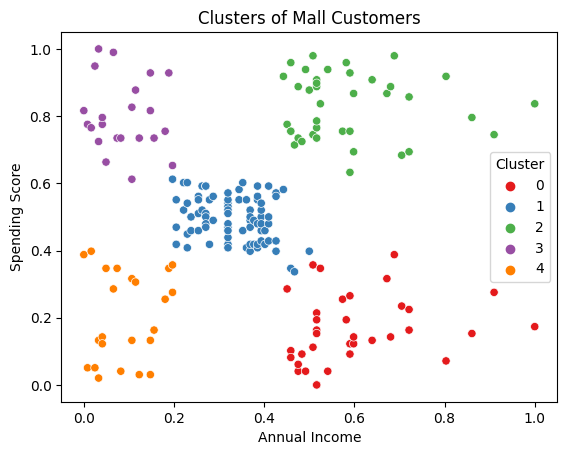

In [146]:
# Based on the Elbow method, selecting the optimal K (5)
k_optimal = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)


# Visualizing the clusters
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [147]:
from sklearn.metrics import silhouette_score
# Calculating the silhouette score for the clustering
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5594854531191121


In [148]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_index = calinski_harabasz_score(X, data['Cluster'])

print('Calinski-Harabasz index:', calinski_harabasz_index)

Calinski-Harabasz index: 264.72980875215893
